In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement= base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent=(session.query(measurement.date).order_by(measurement.date.desc()).first())


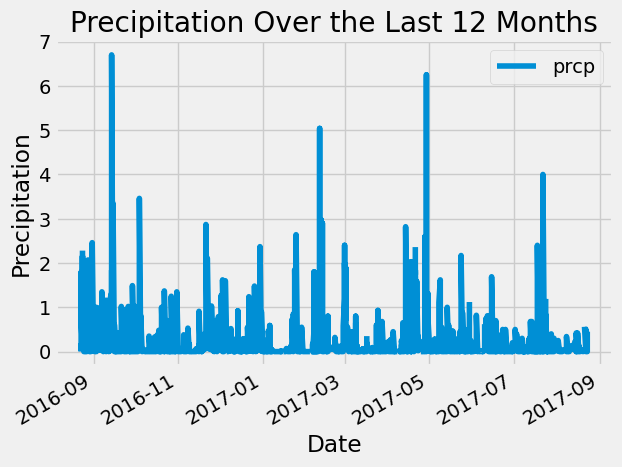

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent[0], '%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.

year = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_prp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year)
data= data_prp.filter(measurement.date <= most_recent[0]).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data, columns=["date", "prcp"])
#df.columns = data.keys()

# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
#df_chart = pd.DataFrame(df_date, columns=['prcp'])
df.plot(y='prcp', kind='line')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over the Last 12 Months')
plt.show()


In [13]:

most_recent



('2017-08-23',)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = df.describe()
summary_table

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total=session.query(func.count(station.name)).all()
total

[(9,)]

In [16]:
#Design a query to find the most active stations#  (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, measurement.id]
total_station=session.query(*sel).group_by(measurement.station).order_by(measurement.id.desc()).all()
total_station



[('USC00516128', 16939),
 ('USC00511918', 14960),
 ('USC00519281', 12188),
 ('USC00519523', 9519),
 ('USC00518838', 9008),
 ('USC00517948', 7636),
 ('USC00514830', 5434),
 ('USC00513117', 2725),
 ('USC00519397', 1)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_results= [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
#active_results= session.query(active_station)#.group_by(measurement.station).order_by(measurement.id.desc()).first()
stuff= session.query(*active_results).\
    order_by(measurement.id.desc())
results =stuff.first()
results

(53.0, 87.0, 73.09795396419437)

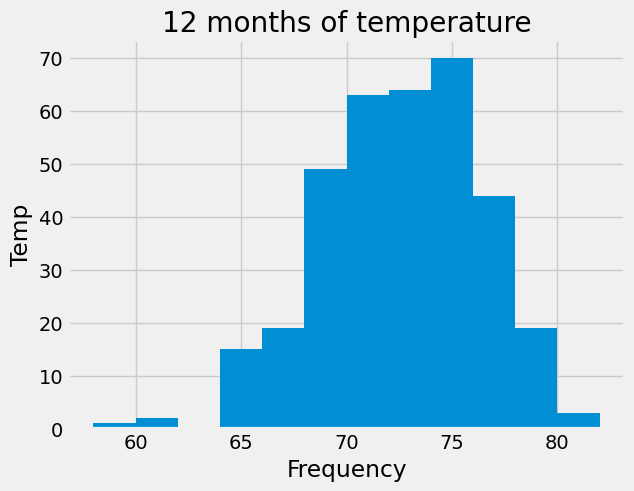

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station = session.query(measurement.tobs).filter(measurement.station=='USC00516128')
data_station= station.filter(measurement.date >=year).all()

active= pd.DataFrame(data_station)
active.hist(bins=12)
plt.title('12 months of temperature')
plt.xlabel('Frequency')
plt.ylabel('Temp')
plt.show()

# Close Session

In [26]:
# Close Session
session.close()